## Importing Libraries

In [84]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


## Importing Data

In [85]:
df=pd.read_csv('day.csv')

In [86]:
#Checking first 5 rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [87]:
#Checking summary statistics
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [88]:
#Checking datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [89]:
#Checking size of dataset
df.shape

(730, 16)

In [90]:
#Checking for any null values
df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [91]:
#Checking for duplicates
df.duplicated().sum()

0

## Observation on raw Data

- The size of the dataset is (730,16).
- We have checked the datatype of all varibles out of which 'season' and 'weathersit' describes categoery but currently they are in 'int' form need to recode them as per data dictiniory.
- There are no null values in datset and no duplicates found.

In [92]:
#To strip spaces if any in column name
df.columns = df.columns.str.strip()

## Data Preprocessing

In [93]:
#Recoding as per Data Dictionary
season_map={1:'spring', 2:'summer', 3:'fall', 4:'winter'}

In [94]:
df['season']=df['season'].map(season_map)

In [95]:
#Checking value counts
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [96]:
df['season'].dtype

dtype('O')

In [97]:
#Recoding
weather_map={1:'cloud',2:'Mist',3:'Light Snow',4:'Heavy Rain'}

In [98]:
df['weathersit']=df['weathersit'].map(weather_map)

In [99]:
#Converting Date column in suitable format for further analysis
df['dteday']=pd.to_datetime(df['dteday'])

In [100]:
#Creating categorical varaible with year labels
df['year']=df['dteday'].dt.year

In [101]:
#Checking data after all preprocessing steps
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,2018-01-01,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,2018
1,2,2018-02-01,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,2018
2,3,2018-03-01,spring,0,1,0,1,1,cloud,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018
3,4,2018-04-01,spring,0,1,0,2,1,cloud,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018
4,5,2018-05-01,spring,0,1,0,3,1,cloud,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018


## EDA
### Univaraite and Bivaraite Analysis

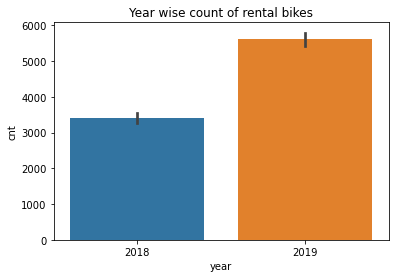

In [102]:
sns.barplot(x='year',y='cnt',data=df)
plt.title('Year wise count of rental bikes')
plt.show()



In [103]:
monthly_count=df.groupby('mnth')['cnt'].sum().reset_index()

In [104]:
order=monthly_count.sort_values(by='cnt')['mnth']

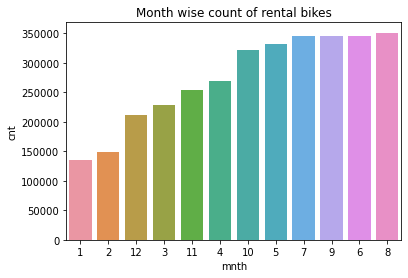

In [105]:

sns.barplot(x='mnth',y='cnt',data=monthly_count,order=order)
plt.title('Month wise count of rental bikes')
plt.show()


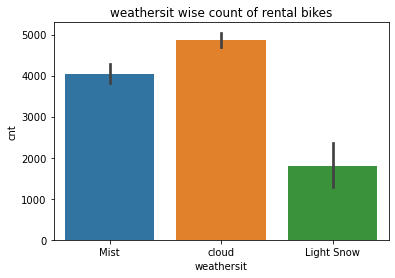

In [106]:
sns.barplot(x='weathersit',y='cnt',data=df)
plt.title('weathersit wise count of rental bikes')
plt.show()


In [ ]:
sns.barplot(x='season',y='cnt',data=df)
plt.title('Season wise count of rental bikes')
plt.show()


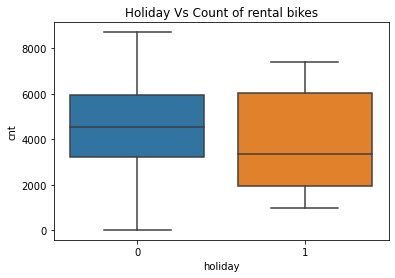

In [24]:
sns.boxplot(x='holiday',y='cnt',data=df)
plt.title('Holiday Vs Count of rental bikes')
plt.show()


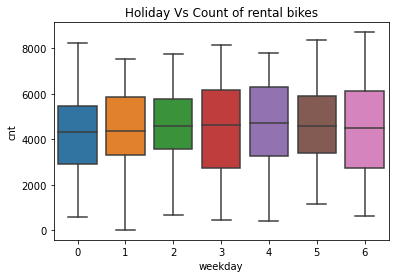

In [25]:
sns.boxplot(x='weekday',y='cnt',data=df)
plt.title('Holiday Vs Count of rental bikes')
plt.show()


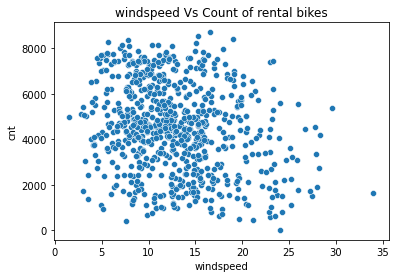

In [26]:
sns.scatterplot(x='windspeed',y='cnt',data=df)
plt.title('windspeed Vs Count of rental bikes')
plt.show()


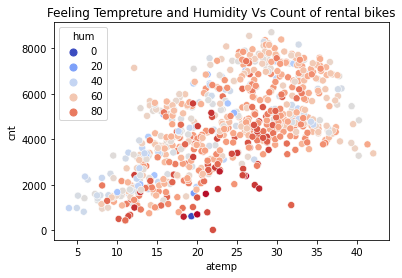

In [27]:
sns.scatterplot(x='atemp',y='cnt',hue='hum',data=df,palette='coolwarm',size='hum',sizes=(50,50))
plt.title('Feeling Tempreture and Humidity Vs Count of rental bikes')
plt.show()


In [28]:
# We are dropping below columns as they don't help us identifying factor affecting the bike rental

df.drop(['instant','dteday','year','casual','registered'],inplace=True,axis=1)

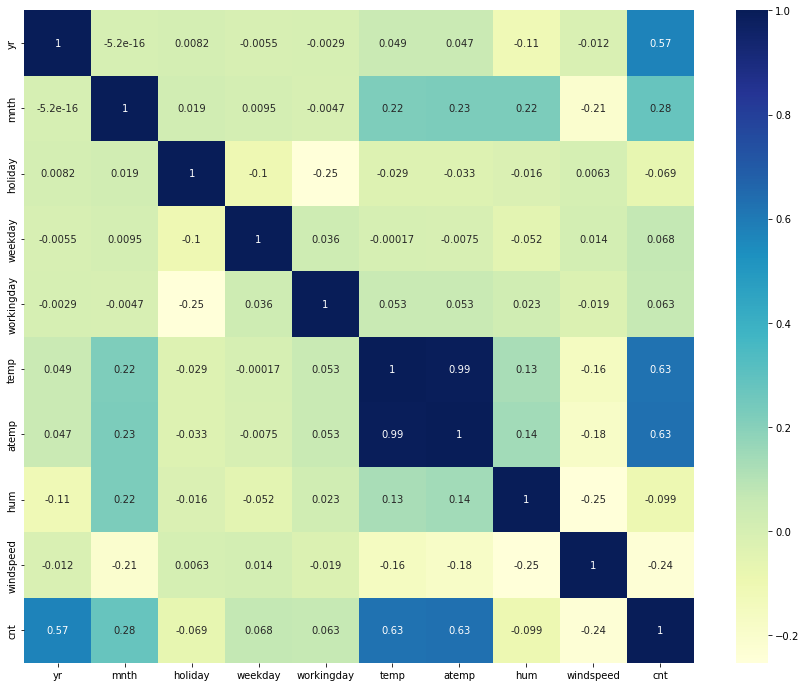

In [29]:
plt.figure(figsize=(15,12))
corr=df.corr()
sns.heatmap(data=corr,annot=True,cmap='YlGnBu')
plt.show()

In [30]:
x_vars=['temp','atemp','hum','windspeed']

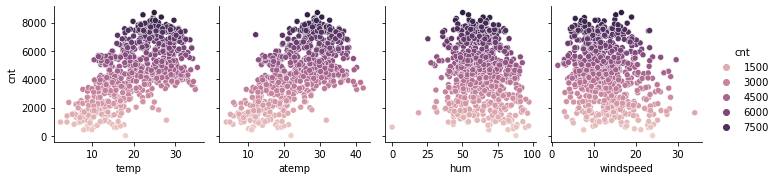

In [31]:
target = 'cnt'
x_vars = ['temp', 'atemp', 'hum', 'windspeed']

# Create a pairplot for the specified input variables against the target variable
sns.pairplot(df, y_vars=[target], x_vars=x_vars, hue=target)
plt.show()

## Key takeaways from EDA

- In 2019, we observe a higher number of bike rentals.
- From June to September, there is an increase in bike rentals.
- The demand for bikes is higher in the fall and summer seasons compared to other seasons.
- The average number of bikes rented on holidays is higher than on weekdays.
- The wind speed scatter plot indicates that most bikes are rented when the wind speed is between 5-20 units, and the tendency to rent bikes decreases as wind speed increases.
- As the temperature increases from 5 to 30 degrees Celsius, there is a consistent increase in the number of bikes rented. However, when the temperature exceeds 35 degrees Celsius, there is a decline in bike rentals.
- Heatmap shows that year and tempreature are positively corelated with cnt


### Encoding of Categorical Varaible

In [32]:
df=pd.get_dummies(df,columns=['weekday','season','weathersit','mnth'],drop_first=True)

In [33]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_Mist', 'weathersit_cloud', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12'],
      dtype='object')

In [34]:
#Splitting data in training and testing

from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

### Scaling of varaible

In [35]:
#Scaling data using minmax scaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [36]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_Mist', 'weathersit_cloud', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12'],
      dtype='object')

In [37]:
#defining numerical varaible which are to be scaled

num_var=['temp','atemp','hum','windspeed','cnt']

In [38]:
df_train[num_var]=scaler.fit_transform(df_train[num_var])

In [39]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_1,weekday_2,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,0,0,0,0


In [40]:
#Dropping Target column

X_train=df_train.drop('cnt',axis=1)

In [41]:
y_train=df_train.pop('cnt')

## Model Building

We are building our initial model using the sklearn library with the Recursive Feature Elimination (RFE) method to identify the most important attributes. After determining the important attributes, we will drop the less important ones. To gain detailed statistical insights, we will use the Ordinary Least Squares (OLS) method to check the significance of the remaining attributes.

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
lm=LinearRegression()
lm.fit(X_train,y_train)



LinearRegression()

In [44]:
rfe = RFE(lm,n_features_to_select=30)
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Mist', True, 1),
 ('weathersit_cloud', True, 1),
 ('mnth_2', True, 1),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1)]

In [46]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [47]:
col=X_train.columns[rfe.support_]

In [48]:
X_train_rfe=X_train[col]

In [49]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_Mist', 'weathersit_cloud', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12'],
      dtype='object')

#### There are no columns with values as false in RFE so we can proceed with OLS method

### Model Building by OLS Method

In [50]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_rfe) #adding constant term


In [51]:
#Fitting the model
lm_1=sm.OLS(y_train,X_train_lm).fit()

In [52]:
##Checking summary of model

lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.42e-181
Time:                        17:26:20   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0325      0.054     -0.606      0.545      -0.138       0.073
yr                   0.2322      0.008     28.792      0.000       0.216       0.248
holiday             -0.0424      0.024     -1.793      0.074      -0.089       0.004
workingday           0.0439      0.009      4.689      0.000       0.025       0.062
temp                 0.4013      0.142      2.821      0.005       0.122       0.681
atemp                0.0506      0.138      0.366      0.714      -0.221       0.322
hum                 -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed           -0.1844      0.026     -7.003      0.000      -0.236      -0.133
weekday_1           -0.0099      0.010     -1.023      0.307      -0.029       0.009
weekday_2           -0.0078      0.011     -0.695      0.488      -0.030       0.014
weekday_3            0.0058      0.011      0.554      0.580      -0.015       0.026
weekday_4            0.0018      0.011      0.165      0.869      -0.020       0.023
weekday_5            0.0116      0.011      1.031      0.303      -0.010       0.034
weekday_6            0.0545      0.015      3.757      0.000       0.026       0.083
season_spring       -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_summer        0.0382      0.026      1.455      0.146      -0.013       0.090
season_winter        0.1054      0.028      3.770      0.000       0.050       0.160
weathersit_Mist      0.1957      0.025      7.810      0.000       0.146       0.245
weathersit_cloud     0.2567      0.026      9.712      0.000       0.205       0.309
mnth_2               0.0304      0.021      1.474      0.141      -0.010       0.071
mnth_3               0.0639      0.022      2.857      0.004       0.020       0.108
mnth_4               0.0626      0.034      1.864      0.063      -0.003       0.129
mnth_5               0.0873      0.036      2.412      0.016       0.016       0.158
mnth_6               0.0609      0.039      1.556      0.120      -0.016       0.138
mnth_7               0.0233      0.044      0.529      0.597      -0.063       0.110
mnth_8               0.0786      0.042      1.873      0.062      -0.004       0.161
mnth_9               0.1444      0.037      3.853      0.000       0.071       0.218
mnth_10              0.0703      0.034      2.041      0.042       0.003       0.138
mnth_11              0.0208      0.033      0.633      0.527      -0.044       0.085
mnth_12              0.0170      0.027      0.641      0.522      -0.035       0.069
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   P

In [53]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,inf
7,weekday_1,inf
8,weekday_2,inf
9,weekday_3,inf
10,weekday_4,inf
11,weekday_5,inf
1,holiday,inf
3,temp,446.31
4,atemp,383.39
5,hum,28.36


### Observation on result

- We observe that a few attributes have both high p-values (>0.05) and high VIFs. Therefore, we will drop these attributes one by one and assess the R-squared and Adjusted R-squared values.

- We will follow above step untill we get optimum values for significance and VIF


In [55]:
#Building second model by dropping below varaibles

X_train_new=X_train_rfe.drop(['weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','mnth_2','mnth_7','mnth_11','mnth_12'],axis=1)

In [56]:
X_train_lm2=sm.add_constant(X_train_new)

In [57]:
X_train_lm2.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'weekday_6', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Mist', 'weathersit_cloud', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10'],
      dtype='object')

In [58]:
lm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model

In [59]:
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.51e-188
Time:                        17:26:20   Log-Likelihood:                 525.37
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0139      0.049  

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,401.13
4,atemp,375.35
5,hum,26.61
12,weathersit_cloud,15.79
11,weathersit_Mist,9.46
9,season_summer,8.99
8,season_spring,6.93
10,season_winter,5.69
2,workingday,5.47
6,windspeed,5.17


In [61]:
### Building the third model

X_train_new3=X_train_new.drop(['holiday','temp','season_summer','mnth_4','mnth_6','mnth_3','mnth_8','mnth_5','weathersit_Mist','mnth_10','hum'],axis=1)

In [62]:
X_train_lm3=sm.add_constant(X_train_new3)

In [63]:
X_train_lm3.columns

Index(['const', 'yr', 'workingday', 'atemp', 'windspeed', 'weekday_6',
       'season_spring', 'season_winter', 'weathersit_cloud', 'mnth_9'],
      dtype='object')

In [64]:
lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

In [65]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     233.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.15e-172
Time:                        17:26:20   Log-Likelihood:                 458.82
No. Observations:                 510   AIC:                            -897.6
Df Residuals:                     500   BIC:                            -855.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1321      0.027  

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.36
1,workingday,4.35
3,windspeed,3.97
7,weathersit_cloud,2.69
0,yr,2.05
5,season_spring,1.86
4,weekday_6,1.77
6,season_winter,1.40
8,mnth_9,1.15


In [67]:
y_train_bike=lm3.predict(X_train_lm3)

### Result in term of equation.

We have chosen to retain the atemp variable in our third model, even though its VIF is slightly above 5. When we attempted to remove atemp, we observed a drastic decrease in the r_square value, suggesting a substantial loss of significant information essential for the model's predictive performance

Linear equation comes out to be -
ypred=0.1321 + 0.24 yr+0.05 workingday+0.4232 atemp-0.146 windspeed+0.06 weekday_6-0.12 season_spring+0.03 season_winter+0.096 weathersit_cloud+0.063 mnth_9


### Resuidal Analysis

In [68]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

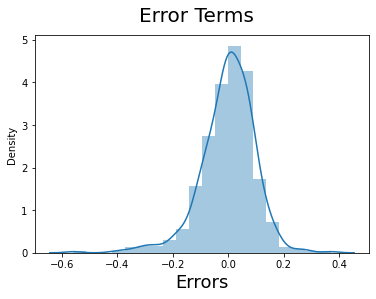

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_bike), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [70]:
#making prediction
df_test[num_var]=scaler.transform(df_test[num_var])

In [71]:
y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
X_test_new=X_test[X_train_new3.columns]


In [73]:
type(X_train_new3)

pandas.core.frame.DataFrame

In [74]:
type(X_test_new)

pandas.core.frame.DataFrame

In [75]:
X_test_new =sm.add_constant(X_test_new)
#X_test_new=sm.add_constant(X_test_new)

In [76]:
y_pred=lm3.predict(X_test_new)

Text(0.5, 0.98, 'y_test vs y_pred')

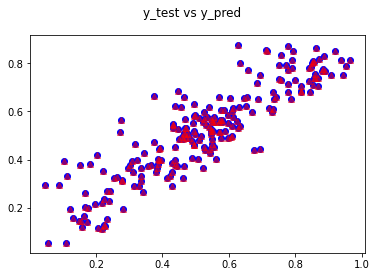

In [78]:
# Plotting y_test and y_pred to understand the spread.

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, c='blue', label='y_test')  # Blue for y_test data points
ax.scatter(y_test, y_pred, c='red', alpha=0.5, label='y_pred', marker='^')  # Red for y_pred data points, with transparency and marker
fig.suptitle('y_test vs y_pred') 

In [79]:
r2_score(y_test, y_pred)


0.7931987105069319

In [80]:
rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
mae_test=metrics.mean_absolute_error(y_test,y_pred)


In [81]:
print('the RMSE value is ',rmse_test)

the RMSE value is  0.09910698447129734


In [82]:
print('the MAE value is ',mae_test)

the MAE value is  0.0764535454217496


### Conclusion

- Value of 0.79 indicates that our model explains approximately 79% of the variance in bike rental demand, which is considered quite good.

- Both RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) values are low, indicating that our model's predictions are close to the actual values, which is a positive sign.

- Season significantly influences our linear regression model, as shown by our analysis. Our exploratory data analysis (EDA) also highlights higher bike rentals in fall and summer seasons.

- Key predictors influencing bike demand include atemp (feeling temperature), windspeed, weather conditions, and whether it's a holiday or a working day.

- Atemp (Feeling Temperature): There is a positive correlation between feeling temperature (in the range of 10-30 degrees Celsius) and bike demand. As the temperature increases within this range, we observe a notable increase in bike rentals.

- windspeed: Lower windspeeds are associated with higher bike demand. This suggests that calm weather conditions tend to positively influence the decision to rent bikes.

- Holiday vs. Working Day: Bike demand is higher on holidays compared to an average working day. This difference in demand pattern highlights the influence of weekdays versus holidays on bike rental behaviour



- The month variable also plays a crucial role in our linear regression model's performance. Specifically, we observed higher demand for shared bikes from June to September.

- Weather conditions also have a notable impact on our linear regression model. For instance, our analysis reveals that bike demand is higher during cloudy weather conditions